# Mini-Assignment 6

## A not-so-short paragraph/multiple very short paragraphs

Originally I had hoped to look at the major operas of Richard Wagner in the orignal German and in translation to English (and possibly French) as they should all be out of copyright. However, while there are high quality version available in German for most of the operas (in HTML format and sperated by act or scene), there are fewer available in English and fewer still in French. That said, not all the operas were avaiable in German either (I could only find <i>Parsifal</i> in English) and could not find <i>Tannhäuser und der Sängerkrieg auf Wartburg</i> at all all.

I was originally going to try and use HaithiTrust in addion to Project Gutenberg and Projekt Gutenberg (the German version in cooperation with <i>Der Spiegel</i>). However, after looking at many of the text-only versions I realized they had incredibly poor OCR that wasn't edited and may have been encoded in ASCII as it was garbled where there should have been diacritics. Many texts were also avaible as search only despite being published in the 19th century.

This left me with a corpus of seven texts in German (of a desired nine), one available only in English and five for which I found the German, and five in French. For the English and French translations some are two or four texts combined in one volume. Ultimately I believe I will need to move away from looking at translation and how things are represented in each langauge and rather look only at the German.

I intend to use Python to extract (some in plain text format and some in HTML format)the texts and save them to my computer, then perform text mining from the local files. For this assignment, I will scrape three urls that make up one text and save them locally. However, I will not be converting or cleaning them (for this assignment only aas I thought it was due on Tuesday rather than Monday), which will result in frequencies likely not being words.

## Creating a directory and importing the URLs

In [1]:
import os

directory = "texts"
if not os.path.exists(directory):
    os.makedirs(directory)

In [7]:
import urllib.request
urlRoot = "https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841"
urls = ["https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/1", "https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/2", "https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/3"]

In [8]:
import re
import time

for url in set(urls):
    clean_url = re.sub(r'\s+', "", url)
    filename = os.path.basename(clean_url)
    path = os.path.join(directory, filename)
    if os.path.exists(path):
        print("already fetched:", clean_url) 
    else: 
        print("fetching:", clean_url) 
        contents = urllib.request.urlopen(urlRoot+clean_url).read()
        with open(path, "wb") as f:
            f.write(contents)

fetching: https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/3
fetching: https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/2
fetching: https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/1


I manually renamed the files to "Meistersinger1.txt", "Meistersinger2.txt", and "Meistersinger3.txt".

## A Voyant visualization of the five most common terms in <i>Die Meistersinger von Nürnberg</i>

In [9]:
from IPython.display import IFrame
IFrame("https://voyant-tools.org/tool/Bubblelines/?query=sachs&query=walther&query=beckmesser&query=eva&query=meister&docId=f8095e74d88fd9f4876c1517db1aea6b&docId=d77a11244aeb2ee12a8a3db9f4b847ed&docId=5aa77b70b1709c59bb9531a4de417df7&corpus=d0b4d68e580fe6fdd41cb0584eb57fc9", width=465, height=338)

With the same text (ideally from your corpus but possibly from elsewhere) generate a simple term frequency graph as has been modelled in the meta-guide. Briefly comment on what you see. Comment the code as appropriate.
## Term Frequency graphs with Python 3, NLTK, and matplotlib.pyplot

I could not figure out how to make one term frequency graph with three files, so there are three graphs.

In [10]:
import matplotlib.pyplot as plt
import nltk

In [32]:
f = open("texts/Meistersinger1.txt", "rb")
part1 = f.read()
part1 [0:100]

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd'

In [35]:
#def fetch(url):
    #response = urllib.request.urlopen(url) # open for reading
    #return response.read()
#part1Url = "https://gutenberg.spiegel.de/buch/die-meistersinger-von-nurnberg-841/1"
#part1Source = fetch(part1Url)

#from bs4 import BeautifulSoup

#def extract(part1Source):
    #soup = BeautifulSoup(part1Source)
    #return soup.find("pre").find("pre").text.strip() 
#part1Text = extract(part1Source) # extract text from source
#part1Text[0:80]

In [33]:
#part1TokensLowercase = nltk.word_tokenize(part1.lower())
#part1WordTokensLowercase = [word for word in part1TokensLowercase if word[0].isalpha()]
part1Freqs = nltk.FreqDist(part1)
part1Freqs.tabulate(20)

   32   101   115    97   105   110   114   116   108    34    62    60     9   104   112    99    47    10   117   111 
22667 11213  7853  7563  6716  6614  6508  6362  6062  4828  4600  4586  4046  3829  3810  3591  3482  3374  3298  3103 


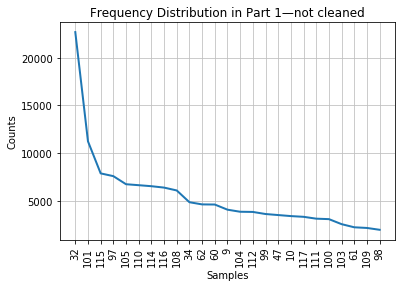

In [34]:
%matplotlib inline

part1Freqs.plot(25, title="Frequency Distribution in Part 1—not cleaned")

In [36]:
f = open("texts/Meistersinger2.txt", "rb")
part2 = f.read()
part2 [0:100]

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd'

In [37]:
part2Freqs = nltk.FreqDist(part1)
part2Freqs.tabulate(20)

   32   101   115    97   105   110   114   116   108    34    62    60     9   104   112    99    47    10   117   111 
22667 11213  7853  7563  6716  6614  6508  6362  6062  4828  4600  4586  4046  3829  3810  3591  3482  3374  3298  3103 


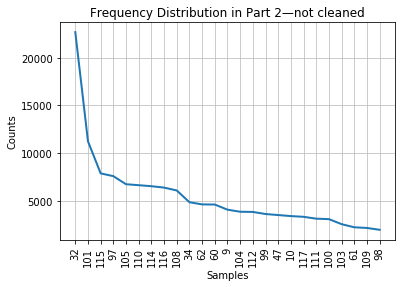

In [38]:
%matplotlib inline

part2Freqs.plot(25, title="Frequency Distribution in Part 2—not cleaned")

In [40]:
f = open("texts/Meistersinger3.txt", "rb")
part3 = f.read()
part3 [0:100]

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd'

In [41]:
part3Freqs = nltk.FreqDist(part1)
part3Freqs.tabulate(20)

   32   101   115    97   105   110   114   116   108    34    62    60     9   104   112    99    47    10   117   111 
22667 11213  7853  7563  6716  6614  6508  6362  6062  4828  4600  4586  4046  3829  3810  3591  3482  3374  3298  3103 


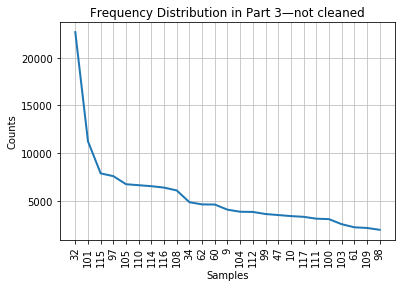

In [43]:
%matplotlib inline

part3Freqs.plot(25, title="Frequency Distribution in Part 3—not cleaned")